In [ ]:
print('01_Tableau_vs_PowerBI starting.')

In [219]:
# who needs warnings?
import warnings
warnings.filterwarnings("ignore")

# api packages
import pyTwitter
twitter = pyTwitter.TwitterAPI()

# data packages
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

print('Packages imported.\n')

In [220]:
# set starting date
start_dt = datetime(2018, 11, 20)

# pull tweets for #Tableau
print('Pulling #Tableau tweets.')
tab = twitter.get_tweets_since('#Tableau', start_dt)
tab['day'] = tab.apply(twitter.get_day, axis=1)
tab = tab[tab['day'] > 20]
print('\nDataframe for #Tableau set up.\n')

# pull tweets for #PowerBI
print('Pulling #PowerBI tweets.')
pbi = twitter.get_tweets_since('#PowerBI', start_dt)
pbi['day'] = pbi.apply(twitter.get_day, axis=1)
pbi = pbi[pbi['day'] > 20]
print('\nDataframe for #PowerBI set up.\n')

In [252]:
print('Defining chart.')
def get_xy(df):
    data = df.groupby(by=['day'])['day'].count()
    data_dict = data.to_dict()
    x = list(data_dict.keys())
    y = list(data_dict.values())
    return x, y
    
def build_dual_bar_chart(df1, df2, search_term, dt):
    figure(num=None, figsize=(12, 6), dpi=80, frameon=False
           , edgecolor='#ffffff', facecolor='#1a2028', linewidth=10)
    ax = plt.subplot()
    xy = get_xy(df1)
    xy2 = get_xy(df2)
    x2  = []
    for n in get_xy(df2)[0]:
        x2.append(n + .35)
    p1 = ax.bar(xy[0], xy[1], color = '#4c75a2', width = 0.35)
    rects = p1.patches
    for rect, label in zip(rects, xy[1]):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom', color='#4c75a2')
        
    p2 = ax.bar(x2, xy2[1], color = '#e9c310', width = 0.35)
    rects = p2.patches
    for rect, label in zip(rects, xy2[1]):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom', color='#e9c310')
        
    ax.set_facecolor('#1a2028')
    plt.title('Tweets for {} since {}'.format(search_term, dt), color='black')
    plt.xlabel('Day', color='black')
    plt.ylabel('Tweet Count', color='black')
    plt.tick_params(axis='x', colors='black')
    plt.tick_params(axis='y', colors='black')
    plt.xticks()
    plt.legend((p1[0], p2[0]), ('#Tableau', '#PowerBI'))

tab_vs_pbi.png saved to local directory.


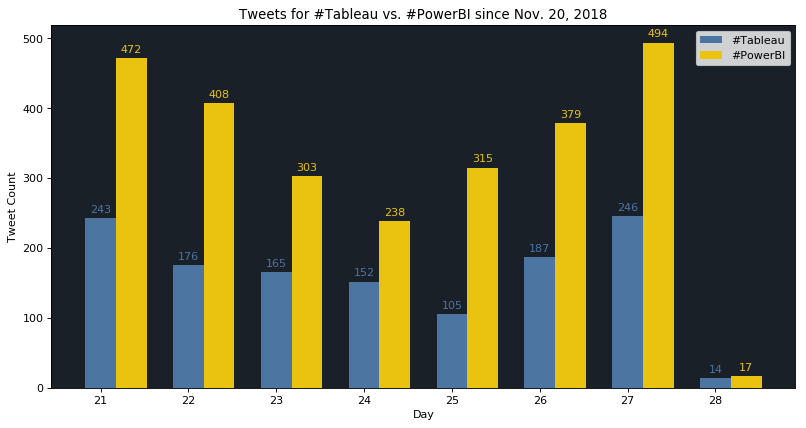

In [254]:
print('Building chart.')
build_dual_bar_chart(tab, pbi, '#Tableau vs. #PowerBI', 'Nov. 20, 2018')
print('Writing chart file')
plt.savefig('tab_vs_pbi.png')
print('tab_vs_pbi.png saved to local directory.')
plt.show()

In [ ]:
print('Closing.')